# Reading external data & Plotting

#### **Importing libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The CSV we read has no header, so it is infering that the first row is the header. However, for this file this is not the case. So we select `header=None`.

To create the header we can do `names=["Timestamp", "Price"]` or direct `df.columns = ["Timestamp", "Price"]`

In [5]:
df = pd.read_csv("data/btc-market-price.csv", header=None, names=["Timestamp", "Price"])
df.head() 

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [6]:
df['Timestamp'] = pd.to_datetime(df["Timestamp"])
df.head()

,Timestamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


In [7]:
df.set_index("Timestamp", inplace=True)
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [8]:
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

We always have a better way:

In [11]:
df = pd.read_csv("data/btc-market-price.csv", 
    header=None, 
    names=["Timestamp", "Price"], 
    index_col=0,
    parse_dates=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-04-02 to 2018-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


### Plotting Basivs
`Pandas` integrates with Matplotlib and creating a plot is very simple

<Axes: xlabel='Timestamp'>

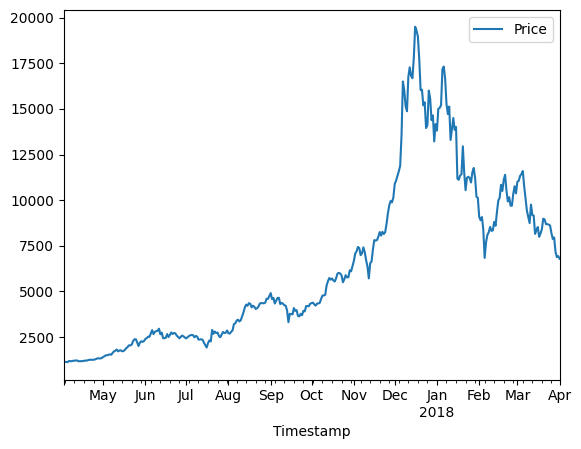

In [18]:
df.plot()

### Handling Missing Data with Pandas

#### **Pandas utility functions**
Similarly to `numpy`, pandas also has a few utility functions to identify and detect null values:

In [19]:
pd.isnull(df)

,Price
Timestamp,
2017-04-02,False
2017-04-03,False
2017-04-04,False
2017-04-05,False
2017-04-06,False
...,...
2018-03-28,False
2018-03-29,False
2018-03-30,False


In [21]:
df.isnull().sum()

Price    0
dtype: int64

You can fill the null using:


In [24]:
df.fillna(df['Price'].mean())

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937
...,...
2018-03-28,7960.380000
2018-03-29,7172.280000
2018-03-30,6882.531667


### Treating non-null data

In [26]:
df = pd.DataFrame({
    'Sex' : ['M', 'M', 'F', 'D', '?'],
    'Age' : [290, 30, 24, 63, 25],
})
df

,Sex,Age
0,M,290
1,M,30
2,F,24
3,D,63
4,?,25


The previous `DataFrame` does not have any "missing value", but clearly has invalid data.

In [27]:
df['Sex'].unique()

array(['M', 'F', 'D', '?'], dtype=object)

In [28]:
df['Sex'].value_counts()

Sex
M    2
F    1
D    1
?    1
Name: count, dtype: int64

In [30]:
df['Sex'].replace({'D': 'F', 'N': 'M'}, inplace=True)
df

,Sex,Age
0,M,290
1,M,30
2,F,24
3,F,63
4,?,25


In [31]:
df[df['Age'] > 100]

,Sex,Age
0,M,290


In [35]:
df.loc[df['Age'] > 100, 'Age'] = df.loc[df['Age'] > 100, 'Age'] / 10
df

,Sex,Age
0,M,29
1,M,30
2,F,24
3,F,63
4,?,25


### Duplicates

In [41]:
df.duplicated(subset=['Sex'])

0    False
1     True
2    False
3     True
4    False
dtype: bool